In [14]:
import pandas as pd
import fsspec

# lakeFS credentials from your docker-compose.yml
ACCESS_KEY = "access_key"
SECRET_KEY = "secret_key"

# lakeFS endpoint (running locally)
lakefs_endpoint = "http://lakefs-dev:8000/"

# lakeFS repository, branch, and file path
repo = "weather"
branch = "main"
path = "weather.parquet"

# Construct the full lakeFS S3-compatible path
lakefs_s3_path = f"s3a://{repo}/{branch}/{path}"

# Configure storage_options for lakeFS (S3-compatible)
storage_options = {
    "key": ACCESS_KEY,
    "secret": SECRET_KEY,
    "client_kwargs": {
        "endpoint_url": lakefs_endpoint
    }
}

# ตัวอย่างพาธไฟล์ที่มีในระบบ
full_file_path = 's3a://weather/main/weather.parquet/year=2025/month=5/day=8/hour=6/439dca34b97444a38671facd7d64e596-0.parquet'

# Use fsspec to create the filesystem
fs = fsspec.filesystem("s3", **storage_options)

# Check if the file exists using the filesystem
def check_file_exists(file_path):
    try:
        # Check if file exists on S3 or lakeFS
        if fs.exists(file_path):
            print(f"File found: {file_path}")
            return True
        else:
            print(f"File not found: {file_path}")
            return False
    except Exception as e:
        print(f"Error checking file: {e}")
        return False

# If file exists, read the data
if check_file_exists(full_file_path):
    try:
        # Read the parquet file using the 'pyarrow' engine
        df2 = pd.read_parquet(
            full_file_path,
            engine='pyarrow',  # Specify engine as pyarrow
            filesystem=fs  # Pass the fsspec filesystem
        )
        print(df2.info())
        print(df2.head())
    except Exception as e:
        print(f"Error reading the parquet file: {e}")
else:
    print("Unable to read the file because it does not exist.")

File found: s3a://weather/main/weather.parquet/year=2025/month=5/day=8/hour=6/439dca34b97444a38671facd7d64e596-0.parquet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype                       
---  ------               --------------  -----                       
 0   timestamp            4 non-null      datetime64[ns]              
 1   minute               4 non-null      int64                       
 2   created_at           4 non-null      datetime64[ns, Asia/Bangkok]
 3   requested_province   4 non-null      object                      
 4   location             4 non-null      object                      
 5   weather_main         4 non-null      object                      
 6   weather_description  4 non-null      object                      
 7   main.temp            4 non-null      float64                     
 8   year                 4 non-null      category                  

array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'minute'}>],
       [<Axes: title={'center': 'created_at'}>,
        <Axes: title={'center': 'main.temp'}>]], dtype=object)

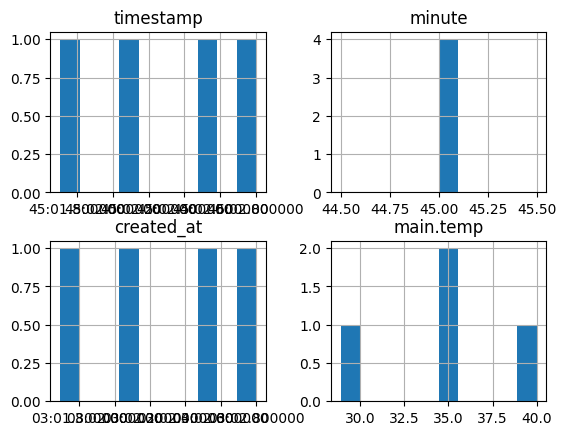

In [15]:
df2.hist()